In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_10x_mtx('C:/Users/aadit/OneDrive - IIT Delhi/Single Cell Sequencing/New Folder (3)', var_names = 'gene_symbols', cache = True)

In [3]:
adata #vars are genes, which are 13136 in number
      # obs are cells, which are 13624 in number

AnnData object with n_obs × n_vars = 13624 × 13136
    var: 'gene_ids'

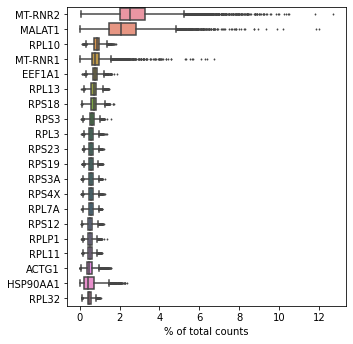

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [8]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

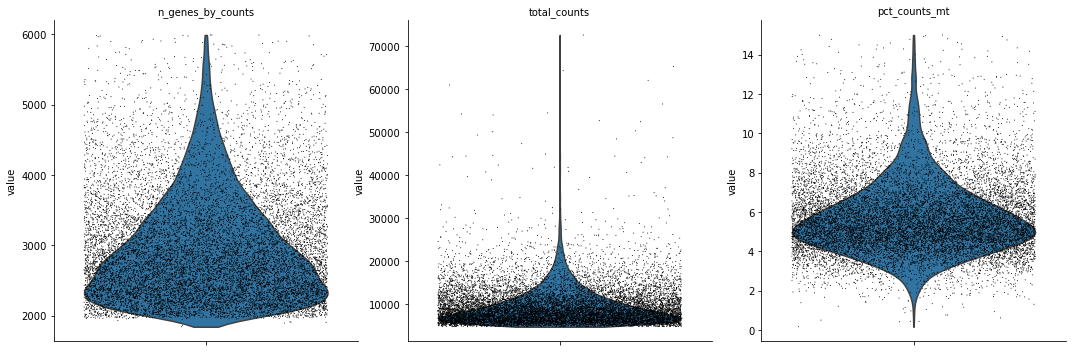

In [9]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

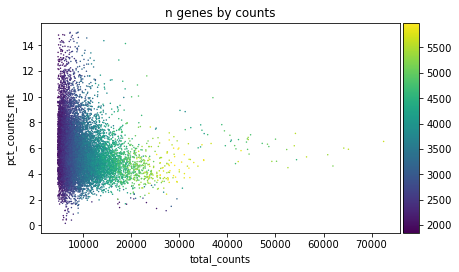

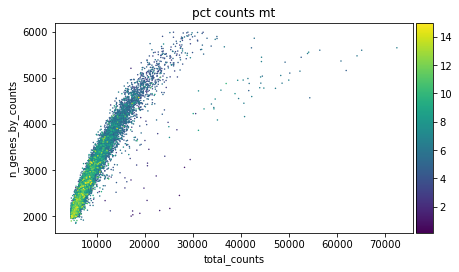

In [10]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color  = 'n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

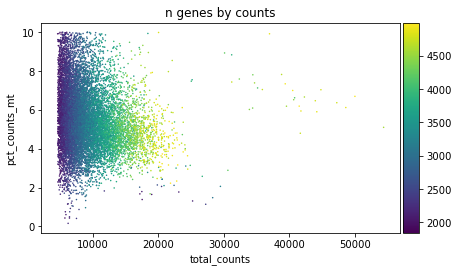

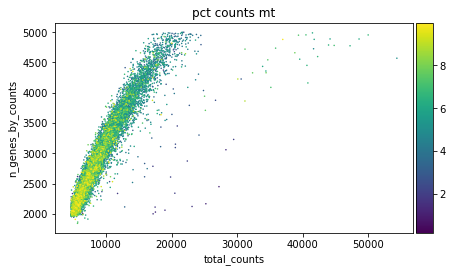

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color  = 'n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.pp.log1p(adata, base = 10)

In [20]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

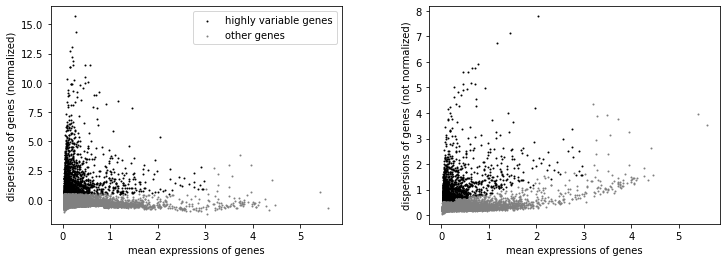

In [21]:
sc.pl.highly_variable_genes(adata) #identify only the biologically variable genes and technically variable genes

In [22]:
adata.raw = adata

In [23]:
adata = adata[:, adata.var.highly_variable]

In [31]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [24]:
sc.pp.scale(adata, max_value=10)

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [25]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=55) #each PC is determined by some combinations of genes

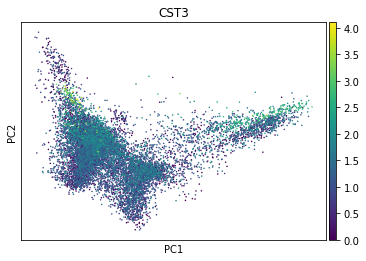

In [26]:
sc.pl.pca(adata, color='CST3')

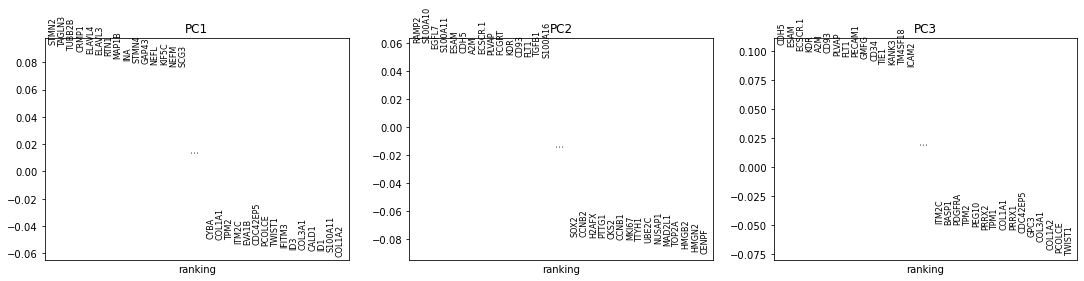

In [27]:
# sc.pl.pca_loadings(adata, components = [i+1 for i in range (adata.obsm['X_pca'].shape[1])])
sc.pl.pca_loadings(adata, components = [i+1 for i in range (3)])

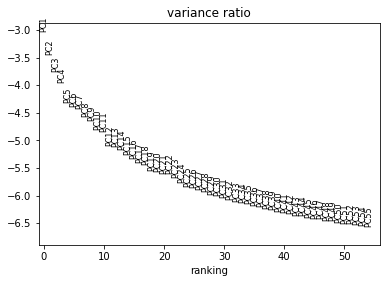

In [28]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = adata.obsm['X_pca'].shape[1])

In [30]:
from kneed import KneeLocator
def PCA_Elbow_fit(data):
    tmp = PCA()
    model = tmp.fit(data)
    explained_variance = model.explained_variance_ratio_
    pcs = list(range(1, explained_variance.shape[0]+1))
    klm = KneeLocator(pcs, explained_variance, S=1.0, curve='convex', direction='decreasing')
    pcs_used = klm.knee
    pcs_used = 23
    pc_list = list(range(1, pcs_used+1))
    new_data = PCA(n_components = pcs_used, svd_solver = "arpack").fit_transform(data)
    return pcs_used, new_data, pcs, explained_variance, pc_list

In [31]:
label = "adata"
new_frame = pd.DataFrame (adata.X, index=adata.obs_names, columns=adata.var_names) 
pandas_data=new_frame.values
dim, new_matrix,pc_ax,pc_ay,col_labels=PCA_Elbow_fit(pandas_data)

In [32]:
columns = ["PC_" + str(i) for i in col_labels]
# output_path = 
PC_frame = pd.DataFrame(new_matrix, index=new_frame.index.values.tolist(), columns=columns)
PC_frame

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23
AAACCCACAACCGTGC,19.766741,1.430660,1.214674,-0.772696,-1.505192,1.811916,-0.054282,-1.030840,-2.144828,-3.160259,...,5.619697,13.892445,-3.309107,3.503773,5.567642,2.067499,3.404580,0.210222,4.002549,1.151921
AAACCCACAAGAAATC,-3.107418,-1.835120,0.093679,-0.312877,0.368506,1.561753,4.593373,-0.599194,2.640188,-0.239847,...,-3.150279,-1.491567,2.691444,3.689585,3.112936,-2.692224,-0.256428,1.237831,-1.262072,-0.985401
AAACCCACACGGTGCT,-2.746900,5.184082,-4.715619,-5.420067,11.501553,13.453951,-7.013536,2.460843,2.360562,-0.429056,...,-4.296685,-1.674978,-0.239291,0.027730,-2.206293,0.927093,-2.330548,2.408260,-1.894518,1.446634
AAACCCACAGTTCCAA,-2.931195,-2.743905,-2.064384,-1.385670,-3.475420,0.004437,-0.474727,-0.434326,1.637678,-1.691331,...,-0.488417,-0.603953,-0.122878,2.816419,5.870223,-2.420165,-1.924336,0.754990,-0.937963,-1.175026
AAACCCACATGAATCC,-1.152658,1.599751,1.854055,-6.683900,-0.296915,2.450219,8.797949,-0.310371,-3.052690,14.280213,...,1.921318,0.280666,-2.426344,-0.093758,-1.205128,2.983448,-1.424363,0.428539,-1.651785,-0.730269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCAGTGGGA,14.663803,9.840434,-5.274899,-2.610757,23.156332,19.946087,-13.843502,5.157753,6.279482,1.846303,...,-0.921971,-3.086111,1.697704,-0.934759,5.379396,-3.950647,-0.831400,2.223479,-1.999866,4.083836
TTTGTTGTCCGTTGAA,-1.797751,5.776175,-1.276905,-8.511100,8.281868,-9.051848,3.145580,-5.257412,-0.502885,-0.679143,...,-1.546721,-1.648486,-2.598947,-1.082345,0.230675,-2.910910,-0.400570,-3.821112,0.332672,1.305060
TTTGTTGTCGCGCTGA,5.373512,-5.347193,4.777524,-8.590685,-3.277379,2.216907,-1.685026,-0.162229,-2.481946,0.609933,...,0.126217,-2.687616,0.299527,-1.781594,1.088310,-2.511696,-2.673646,0.587014,1.814148,-1.836612
TTTGTTGTCGTAGTCA,-9.110810,8.158795,0.748562,0.088976,-7.153773,-0.236446,-2.347694,7.892031,-6.205622,-3.666057,...,-2.796122,4.139896,3.813390,-2.029291,-4.225927,-1.584045,-0.980924,0.360083,-3.272535,-1.281997


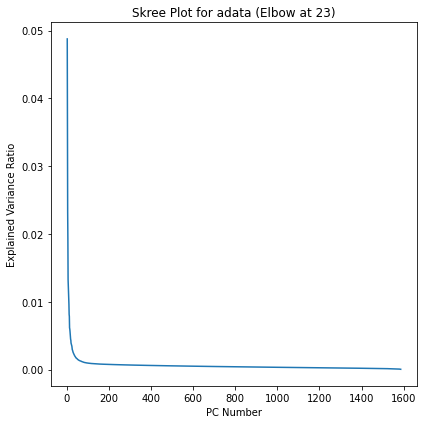

In [33]:
fig= plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_title("Skree Plot for "+label+" (Elbow at "+str(dim)+")") 
ax1.plot(pc_ax, pc_ay)
ax1.set_xlabel("PC Number")
ax1.set_ylabel("Explained Variance Ratio")
fig. tight_layout()

In [34]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=dim)

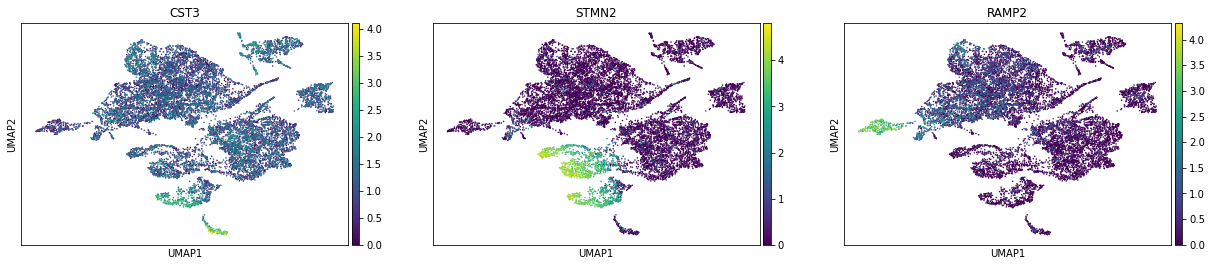

In [35]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['CST3', 'STMN2', 'RAMP2'])

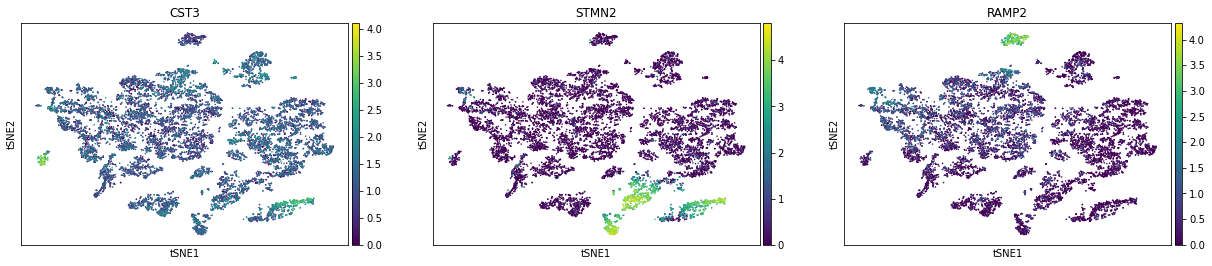

In [36]:
sc.tl.tsne(adata, n_pcs = 23)
sc.pl.tsne(adata, color=['CST3', 'STMN2', 'RAMP2'])

In [37]:
# !mkdir write
results_file = 'write/this.h5ad'
adata.write(results_file)

In [49]:
sc.tl.leiden(adata, resolution = 0.5)

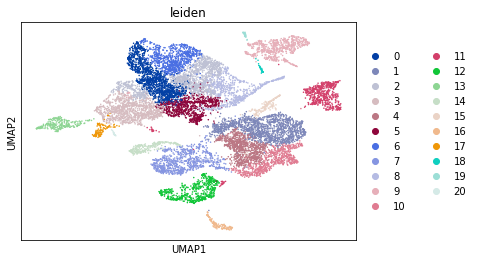

In [50]:
sc.pl.umap(adata, color=['leiden'])

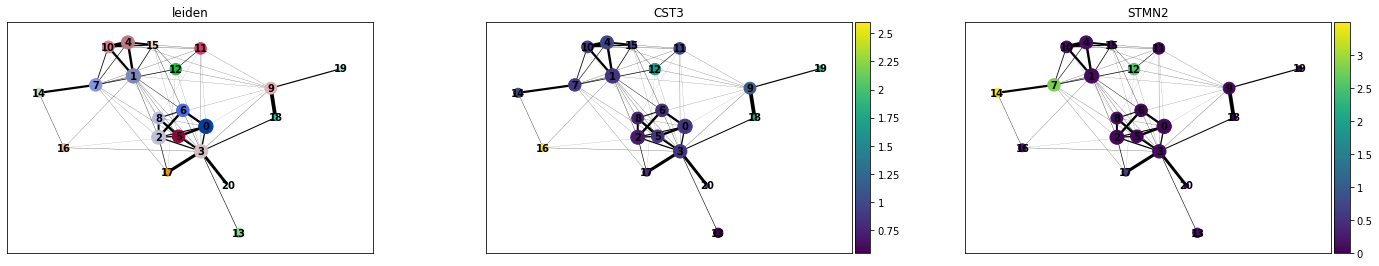

In [51]:
sc.tl.paga(adata, groups='leiden')
sc.pl.paga (adata, color=['leiden', 'CST3', 'STMN2'])

In [ ]:
# sc.tl.draw_graph(adata, init_pos='paga') 
# sc.pl.draw_graph(adata, color=['leiden', 'CST3', 'STMN2'], legend_loc='on data')

In [ ]:
# sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [251]:
sc.settings.verbosity = 2  # reduce the verbosity

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\ProgramData\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually

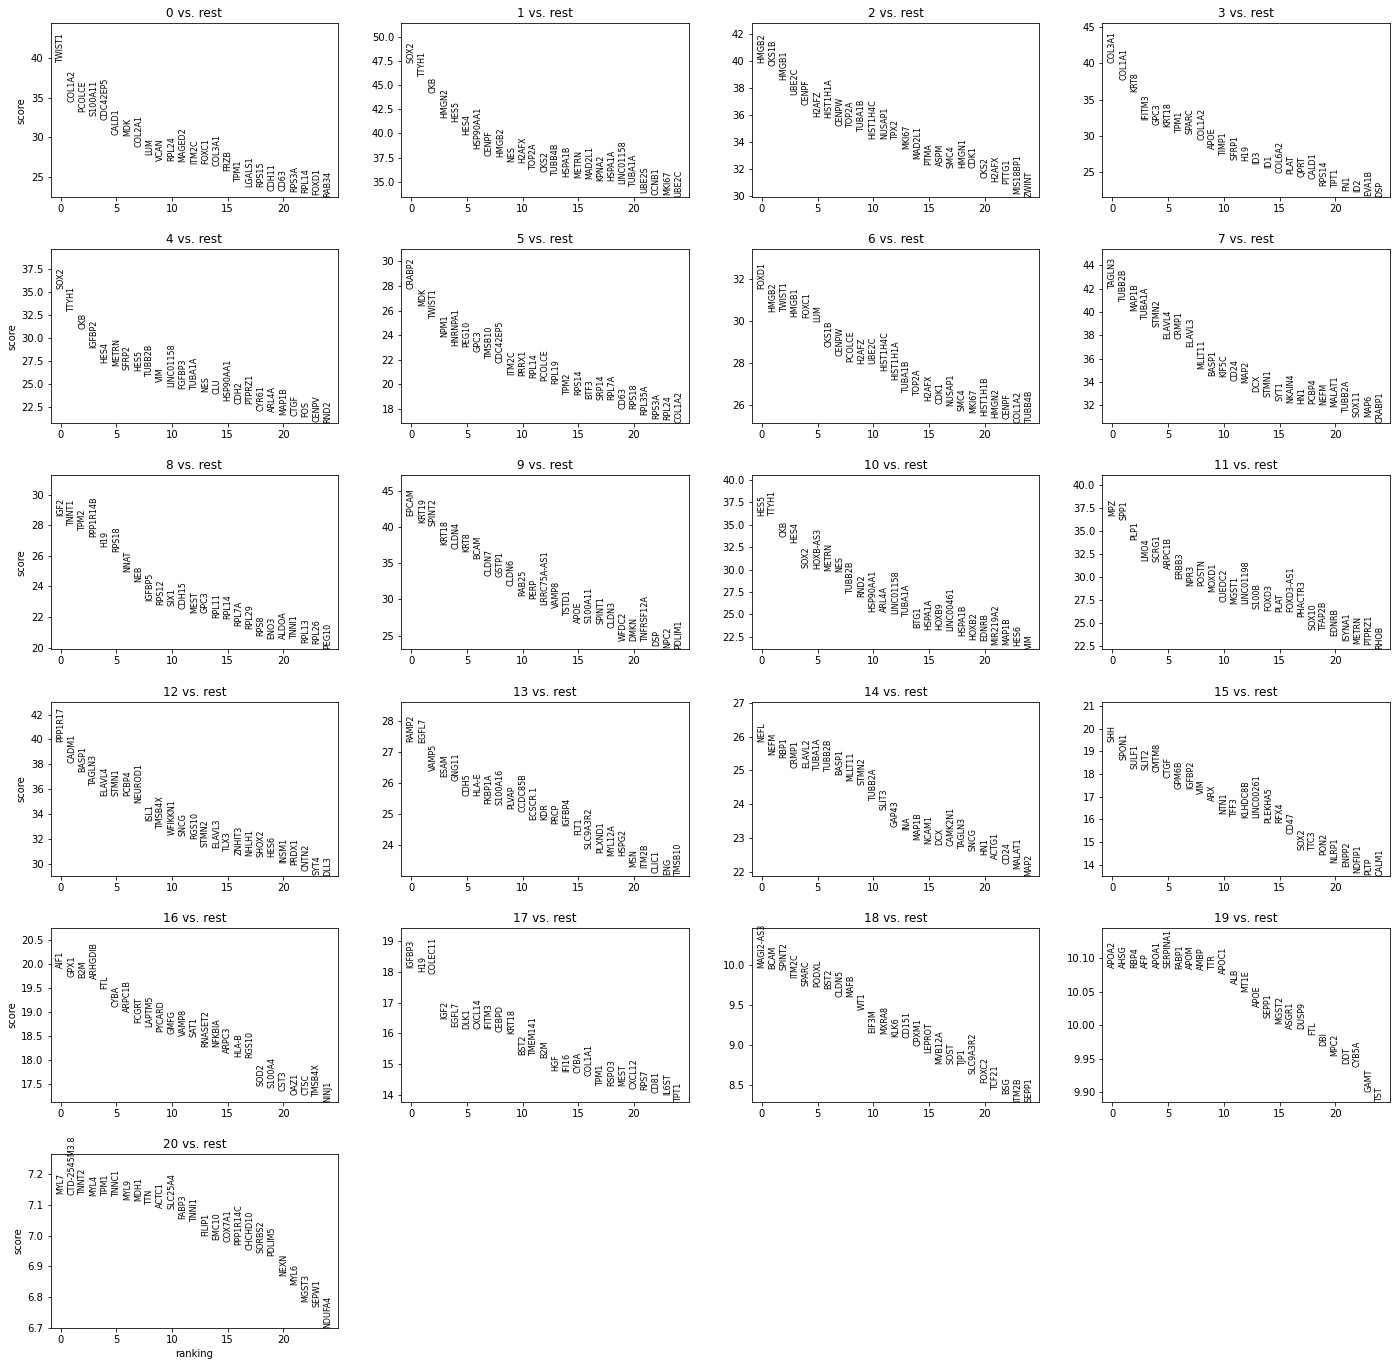

In [52]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
# sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [53]:
adata.write(results_file)

In [54]:
adata = sc.read(results_file)

In [55]:
pd.DataFrame(adata.uns['rank_genes_groups']['names'])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,TWIST1,SOX2,HMGB2,COL3A1,SOX2,CRABP2,FOXD1,TAGLN3,IGF2,EPCAM,...,MPZ,PPP1R17,RAMP2,NEFL,SHH,AIF1,IGFBP3,MAGI2-AS3,APOA2,MYL7
1,COL1A2,TTYH1,CKS1B,COL1A1,TTYH1,MDK,HMGB2,TUBB2B,TNNT1,KRT19,...,SPP1,CADM1,EGFL7,NEFM,SPON1,GPX1,H19,BCAM,AHSG,CTD-2545M3.8
2,PCOLCE,CKB,HMGB1,KRT8,CKB,TWIST1,TWIST1,MAP1B,TPM2,SPINT2,...,PLP1,BASP1,VAMP5,RBP1,SULF1,B2M,COLEC11,SPINT2,RBP4,TNNT2
3,S100A11,HMGN2,UBE2C,IFITM3,IGFBP2,NPM1,HMGB1,TUBA1A,PPP1R14B,KRT18,...,LMO4,TAGLN3,ESAM,CRMP1,SLIT2,ARHGDIB,IGF2,ITM2C,AFP,MYL4
4,CDC42EP5,HES5,CENPF,GPC3,HES4,HNRNPA1,FOXC1,STMN2,H19,CLDN4,...,SCRG1,ELAVL4,GNG11,ELAVL2,CMTM8,FTL,EGFL7,SPARC,APOA1,TPM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,MAP1B,RPS18,COTL1,IGFBP2,COL3A1,METRN,FTL,ID3,COTL1,NNAT,...,LDHA,ZFP36L1,TMSB15A,EEF1B2,RPS23,NGFRAP1,CENPV,RPS12,TUBB,MARCKSL1
13132,HN1,RPL15,TMSB4X,TUBB,COL1A2,CALM2,TUBA1A,NPM1,HSP90AA1,HSPA1A,...,MALAT1,CYR61,CENPV,RPLP1,RPL37,CNN3,PRDX2,RPL10,STMN1,RPS19
13133,TUBA1A,RPS14,MAP1B,YBX1,RBP1,HES4,CD24,EEF1B2,HES4,MARCKS,...,MEIS2,ID1,PEBP1,NPM1,EEF1B2,HNRNPA1,CD24,RPS3,H3F3A,PTMA
13134,CKB,TPT1,METRN,TUBA1B,S100A11,TUBB4B,CKB,RPL41.1,PTN,TUBA1A,...,BASP1,ID3,PRDX2,RPL41.1,PTMA,MDK,HMGA1,RPL13,TUBA1A,RPS3


In [57]:
adata.uns

OverloadedDict, wrapping:
	{'hvg': {'flavor': 'seurat'}, 'leiden': {'params': {'n_iterations': -1, 'random_state': 0, 'resolution': 0.5}}, 'leiden_colors': array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7'], dtype=object), 'leiden_sizes': array([1445, 1433, 1313, 1090,  969,  872,  832,  806,  697,  668,  643,
        608,  571,  260,  235,  155,  134,  115,   34,   34,   17]), 'log1p': {'base': 10}, 'neighbors': {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 10, 'n_pcs': 23, 'random_state': 0}}, 'paga': {'connectivities': <21x21 sparse matrix of type '<class 'numpy.float64'>'
	with 208 stored elements in Compressed Sparse Row format>, 'connectivities_tree': <21x21 sparse matrix of type '<cla

In [58]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,16_n,16_p,17_n,17_p,18_n,18_p,19_n,19_p,20_n,20_p
0,TWIST1,0.000000e+00,SOX2,0.000000e+00,HMGB2,0.000000e+00,COL3A1,0.000000e+00,SOX2,1.521372e-272,...,AIF1,2.670771e-88,IGFBP3,1.592896e-73,MAGI2-AS3,2.237449e-23,APOA2,6.382433e-24,MYL7,9.622129e-13
1,COL1A2,1.738044e-260,TTYH1,0.000000e+00,CKS1B,0.000000e+00,COL1A1,0.000000e+00,TTYH1,4.733622e-236,...,GPX1,1.088474e-86,H19,2.260766e-72,BCAM,2.665399e-23,AHSG,6.382433e-24,CTD-2545M3.8,9.778002e-13
2,PCOLCE,6.638973e-241,CKB,0.000000e+00,HMGB1,0.000000e+00,KRT8,2.187262e-285,CKB,1.049527e-210,...,B2M,2.052253e-86,COLEC11,7.210986e-72,SPINT2,2.826420e-23,RBP4,6.382433e-24,TNNT2,9.810400e-13
3,S100A11,1.494453e-233,HMGN2,0.000000e+00,UBE2C,2.684255e-307,IFITM3,8.128880e-228,IGFBP2,3.150477e-184,...,ARHGDIB,2.366370e-86,IGF2,6.869593e-61,ITM2C,7.526544e-23,AFP,6.388415e-24,MYL4,1.012587e-12
4,CDC42EP5,2.683732e-227,HES5,0.000000e+00,CENPF,9.976049e-296,GPC3,2.607290e-218,HES4,1.885906e-163,...,FTL,1.419252e-84,EGFL7,3.828277e-59,SPARC,2.078619e-22,APOA1,6.403395e-24,TPM1,1.013065e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,MAP1B,1.053341e-149,RPS18,3.815989e-178,COTL1,4.733581e-107,IGFBP2,5.349054e-116,COL3A1,7.370354e-138,...,NGFRAP1,6.047478e-58,CENPV,1.497633e-32,RPS12,1.425785e-17,TUBB,5.528905e-21,MARCKSL1,6.914390e-11
13132,HN1,6.651847e-160,RPL15,1.819761e-182,TMSB4X,3.731095e-112,TUBB,7.517045e-124,COL1A2,3.588184e-173,...,CNN3,4.452578e-60,PRDX2,2.137673e-33,RPL10,1.320631e-17,STMN1,3.179264e-21,RPS19,6.546553e-11
13133,TUBA1A,1.514030e-198,RPS14,1.085935e-200,MAP1B,1.523849e-114,YBX1,2.224915e-137,RBP1,5.857731e-175,...,HNRNPA1,1.283344e-61,CD24,1.387780e-35,RPS3,6.589575e-18,H3F3A,3.095097e-21,PTMA,2.332888e-11
13134,CKB,8.291410e-268,TPT1,4.150156e-251,METRN,1.375102e-142,TUBA1B,9.616337e-144,S100A11,3.790355e-190,...,MDK,5.469256e-64,HMGA1,9.105853e-44,RPL13,4.465389e-18,TUBA1A,9.055418e-22,RPS3,1.115286e-11


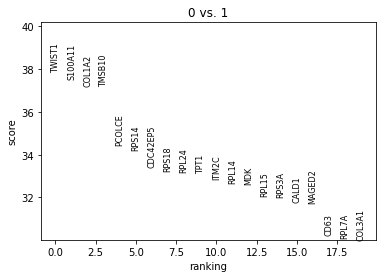

In [59]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

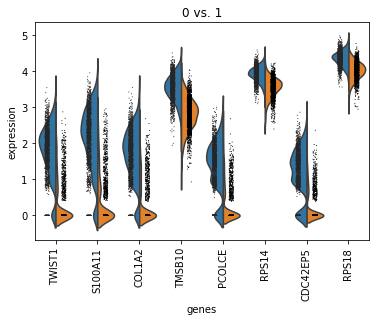

In [60]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [61]:
adata = sc.read(results_file)

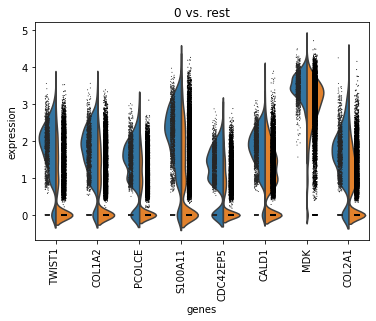

In [62]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

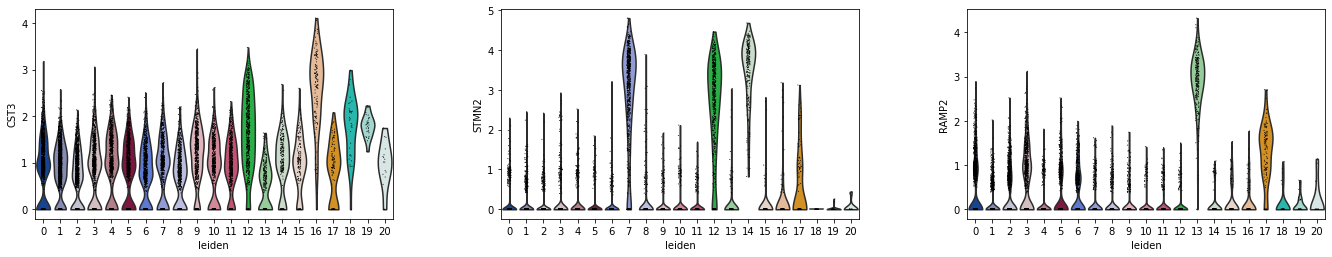

In [63]:
sc.pl.violin(adata, ['CST3', 'STMN2', 'RAMP2'], groupby='leiden', n_genes=8)

In [ ]:
# adata.obs['leiden'].cat.categories

In [ ]:
# new_cluster_names = [
#     'CD4 T', 'CD14 Monocytes',
#     'B', 'CD8 T',
#     'NK', 'FCGR3A Monocytes',
#     'Dendritic', 'Megakaryocytes']
# for i in range(23):
#     new_cluster_names.append(str(i))
# adata.rename_categories('leiden', new_cluster_names)
# # new_cluster_names

In [ ]:
# sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
# marker_genes = ['SAMD11', 'RP11-54O7.17', 'HES4', 'ISG15', 'ACAP3', 'TFF3', 'COL18A1',
#                 'COL6A2', 'S100B', 'DGCR6.1', 'STMN2', 'RAMP2', 'CST3']

In [ ]:
# sc.pl.dotplot(adata, marker_genes, groupby='leiden');

In [ ]:
# sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);